In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv("../artifacts/raw/data.csv")

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='Species'>

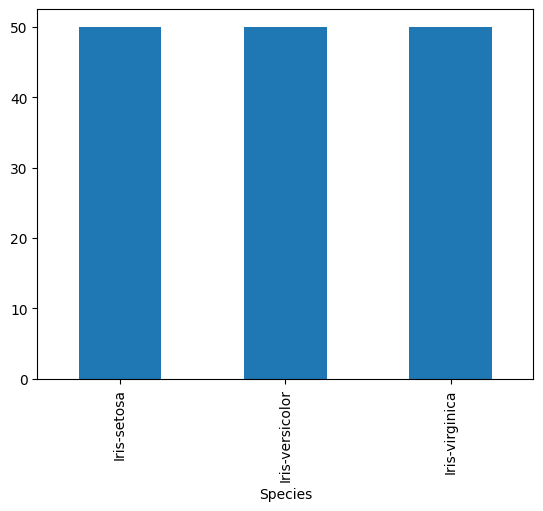

In [12]:
df["Species"].value_counts().plot(kind="bar")

In [13]:
df.drop(columns=["Id"],inplace=True)


In [14]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


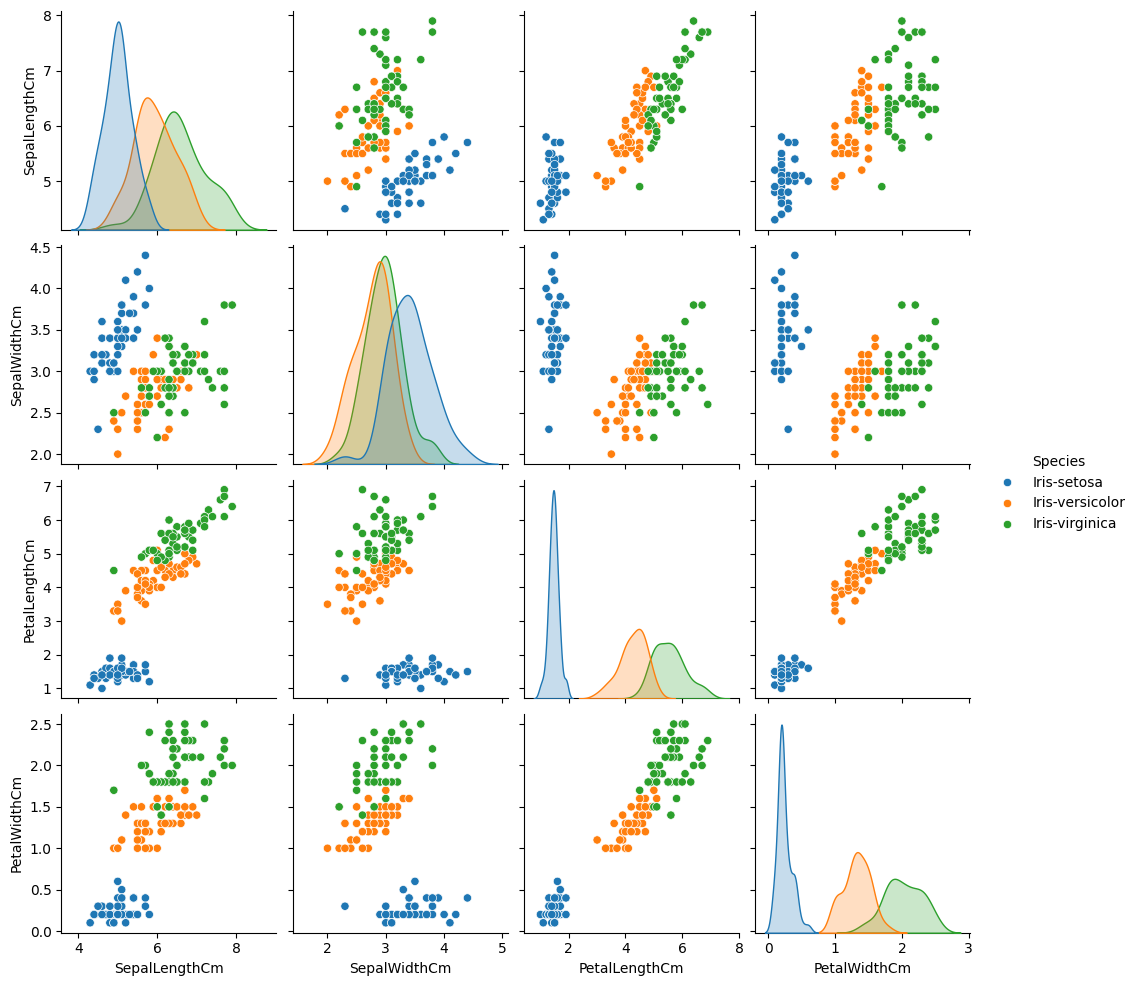

In [15]:
sns.pairplot(df,hue="Species")
plt.show()  

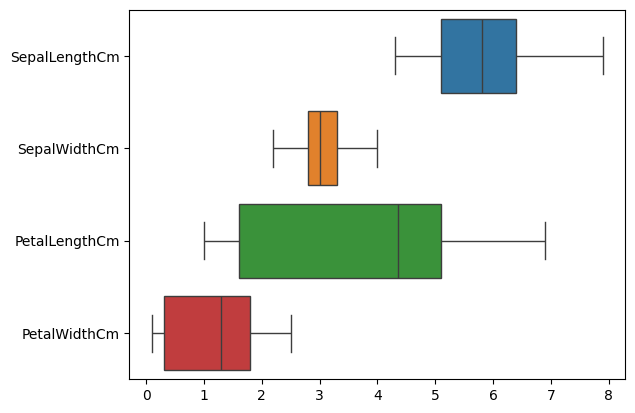

In [24]:
sns.boxplot(data=df,orient="h")
plt.show()

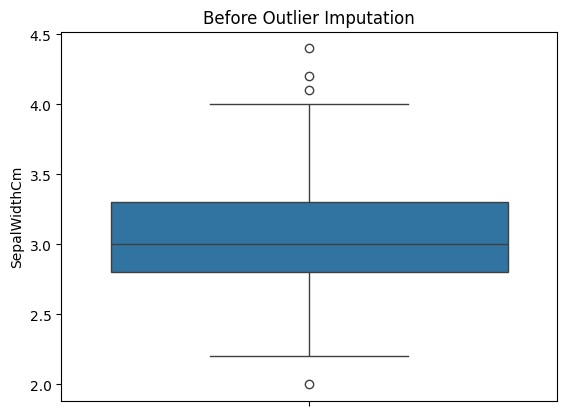

In [17]:
sns.boxplot(df["SepalWidthCm"])
plt.title("Before Outlier Imputation")
plt.show()

In [18]:
Q1=df["SepalWidthCm"].quantile(0.25)
Q3=df["SepalWidthCm"].quantile(0.75)
IQR=Q3-Q1
Lower_value=Q1-1.5*IQR
Upper_value=Q3+1.5*IQR
sepal_median=np.median(df["SepalWidthCm"])

In [21]:
sepal_median

np.float64(3.0)

In [22]:
for i in df["SepalWidthCm"]:
    if i<Lower_value or i>Upper_value:
        df["SepalWidthCm"].replace(i,sepal_median,inplace=True) 

/tmp/ipykernel_207658/2531638849.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SepalWidthCm"].replace(i,sepal_median,inplace=True)


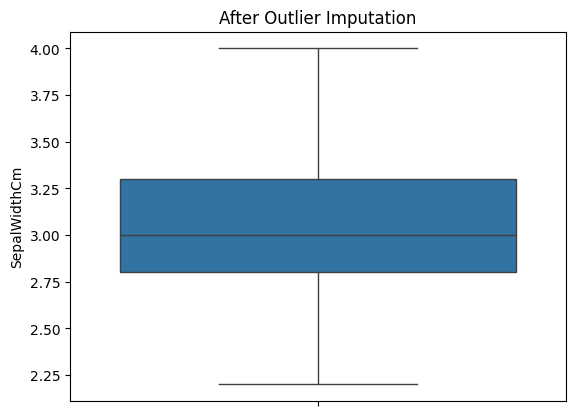

In [23]:
sns.boxplot(df["SepalWidthCm"])
plt.title("After Outlier Imputation")
plt.show()

In [ ]:
### Modell TRAINING USING DT

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix



In [26]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [27]:
X=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y=df["Species"]

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
tree_clf=DecisionTreeClassifier(criterion="gini",max_depth=30,random_state=42)


In [30]:
tree_clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
y_pred=tree_clf.predict(X_test)

In [47]:
accuracy = tree_clf.score(X_test, y_test)
accuracy

1.0

In [50]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

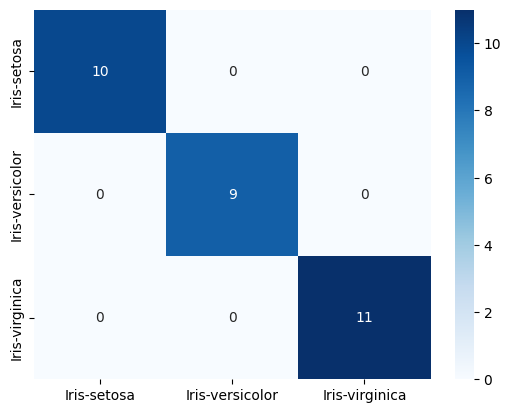

In [53]:
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=df["Species"].unique(),yticklabels=df["Species"].unique())
plt.show()

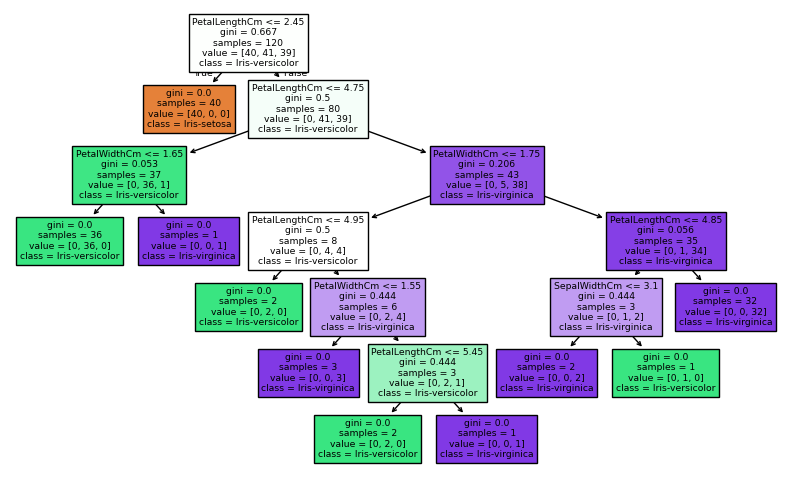

In [54]:
plt.figure(figsize=(10,6))
plot_tree(tree_clf,filled=True,feature_names=X.columns,class_names=df["Species"].unique())
plt.show()

In [55]:
tree_clf.feature_importances_

array([0.        , 0.01667014, 0.90614339, 0.07718647])